# Контрольная работа 1

Выполнила: Жемойтяк Наталья Павловна

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.datasets import make_blobs

### Задание 1 (5 очков)

Реализуйте функцию для визуализации обучения модели DBSCAN на двумерных данных со следующими условиями:

1. Подсветить корневые точки.
2. Показать итеративное формирование каждого кластера, подсвечивая текущую корневую точку и её окрестность.
3. Тесктом вывести на экран количество точек в каждом кластере.

In [ ]:
def visualize_dbscan_learning(X, eps, min_samples):
    X = StandardScaler().fit_transform(X)
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X)
    for i, label in enumerate(labels):
        plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='.')
        plt.title(f"Iteration {i + 1}")
        plt.scatter(X[i, 0], X[i, 1], c='red', marker='x', s=100, label='Root Point')
        neighbors_indices = dbscan.components_[i]
        plt.scatter(neighbors_indices[0], neighbors_indices[ 1], c='blue', marker='o', s=50, label='Cluster Neighborhood')
        unique_labels, counts = np.unique(labels, return_counts=True)
        cluster_info = '\n'.join([f'Cluster {label}: {count} points' for label, count in zip(unique_labels, counts)])
        plt.text(1.5, -3, cluster_info, bbox=dict(facecolor='white', alpha=0.5))
        plt.legend()
        plt.show()
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)
visualize_dbscan_learning(X, eps=0.3, min_samples=5)

### Задание 2 (3 очка)

1. Проведите предварительную обработку данных.
2. Постройте модели классификации на основе различных методов, изученных вами из встроееной библиотеки. 
3. Подберите оптимальные гиперпараметры моделей используя различные оценки, кросс-валидацию и валидационные кривые.
4. Сделайте выводы о точности моделей. Выберите самую оптимальную. Тщательно поясните свой выбор!
5. Выберите самую оптимальную на ваш взгляд модель (Использовать встроенную и собственную реализацию моделей и сравнить результат)

##### Вариант 1

[Данные](https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset)

##### Вариант 2

[Данные](https://archive.ics.uci.edu/dataset/109/wine)

### Задание 3. (2 очка)

С помощью метода главных компонент провести понижение размерности. Визуализируйте полученные данные и процент объясняемой дисперсии.
[Данные](https://data.world/sdhilip/pizza-datasets)

и ссылочка на каггл: [Данные](https://www.kaggle.com/datasets/shishir349/can-pizza-be-healthy/)

Проведите кластеризацию новых данных с помощью любого алгоритма.

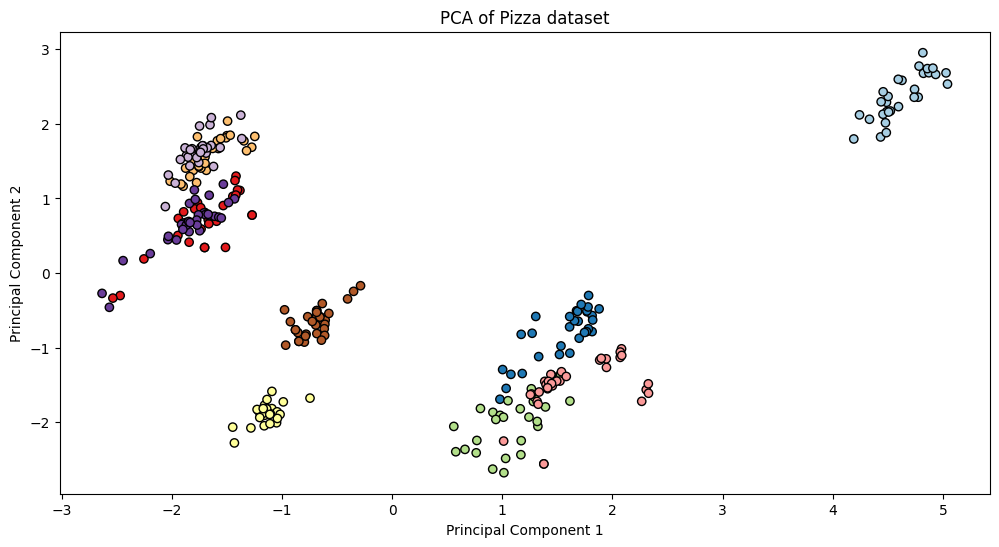

Explained Variance Ratio:
[0.52163044 0.28631263]

Cumulative Explained Variance:
[0.52163044 0.80794307]


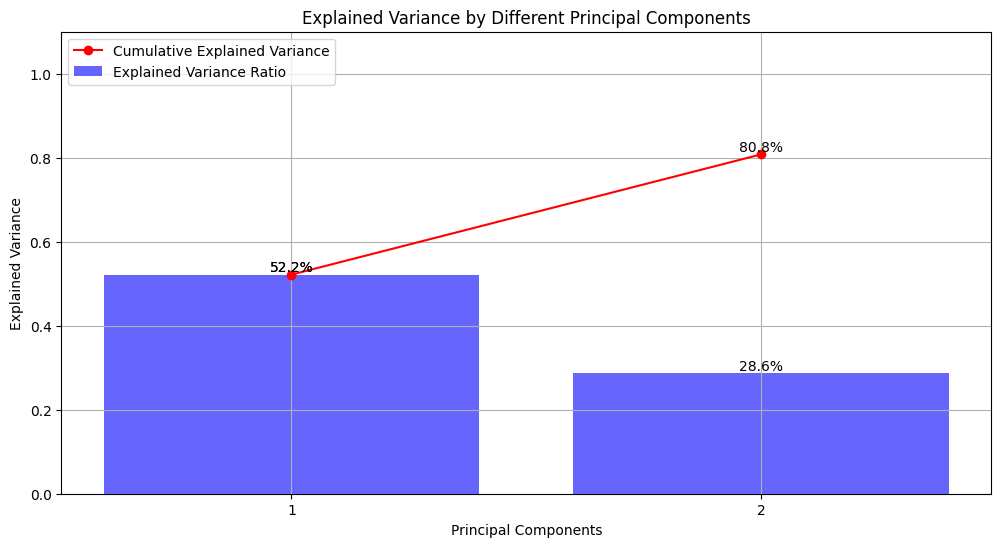

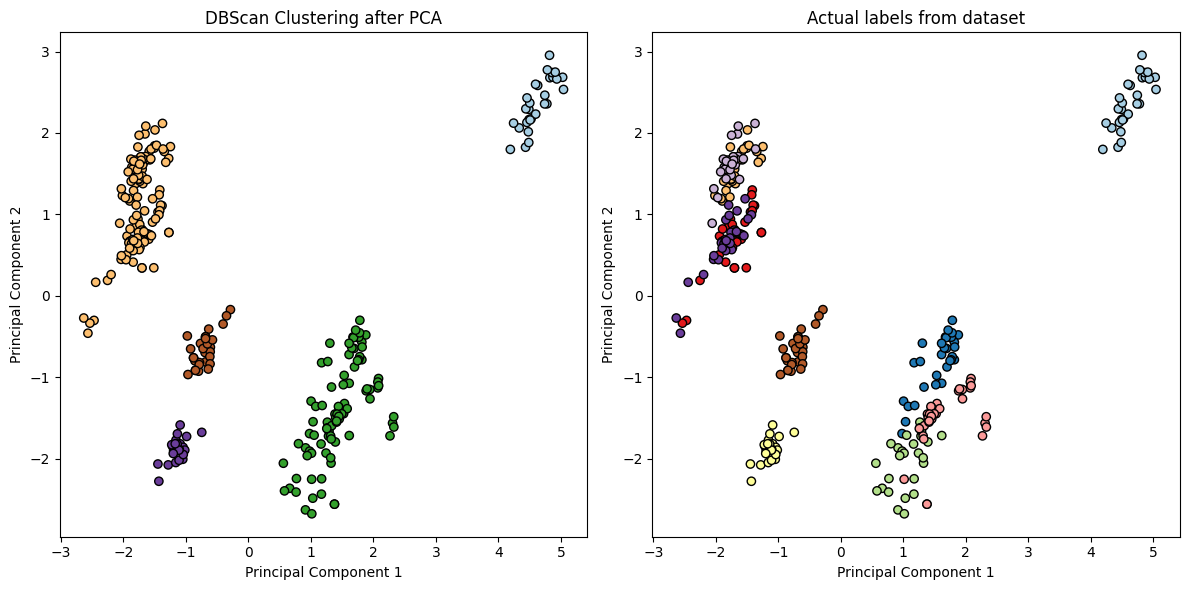

In [42]:

df = pd.read_csv("Pizza.csv")

X = df.drop('brand', axis=1)
y_raw = df['brand']

le = LabelEncoder()
le.fit(y_raw)
y = le.transform(y_raw)

scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)

plt.figure(figsize=(12, 6))

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.title('PCA of Pizza dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)


print("Explained Variance Ratio:")
print(explained_variance_ratio)
print("\nCumulative Explained Variance:")
print(cumulative_explained_variance)


plt.figure(figsize=(12, 6))

bar = plt.bar(range(1, 3), explained_variance_ratio, alpha=0.6, color='b', label='Explained Variance Ratio')
cum_val= plt.plot(range(1, 3), cumulative_explained_variance, marker='o', linestyle='-', color='r', 
                label='Cumulative Explained Variance')

for i, (bar, cum_val) in enumerate(zip(bar, cumulative_explained_variance)):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{explained_variance_ratio[i]*100:.1f}%', 
             ha='center', va='bottom')
    plt.text(i+1, cum_val, f'{cum_val*100:.1f}%', ha='center', va='bottom')
    
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Different Principal Components')
plt.xticks(range(1, 3))
plt.legend(loc='upper left')
plt.ylim(0, 1.1)
plt.grid(True)
plt.show()

dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_pca)


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap=plt.cm.Paired, edgecolors='k')
plt.title('DBScan Clustering after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.title('Actual labels from dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()